Creates a bar graph grouping notes monthly, comparing note created with notes modified.  
If you don't want to use the dependancy management tool "Poetry"  
the one dependancy is matplotlib. If you use "Poetry"  
the pyproject.toml is in the repository.  

If don't use The Archive, you can edit the line defining the target directory  
`zettelkasten = pathlib.Path("/path to target directory")`  
You can also remove the import
`from functions.archive_path import TheArchivePath`
This should work on any directory that contains notes.

In this next block we set imports and variables

In [6]:
import os
import datetime
from functions.archive_path import TheArchivePath

# Directory to search for files
directory = TheArchivePath()

# Search string to filter files
search_string = " 20"

# Create a dictionary to store the created counts for each month
created_counts = {}
# Create a dictionary to store the modified counts for each month
modified_counts = {}
# Create a dictionary to store the merged created and modified counts
counts = {}

# Get the current year and month
now = datetime.datetime.now()
current_year = now.year
current_month = now.month

In this block, a dictionary is created that combines the created_counts and the modified_counts by month.

This block looks at all the note's created timestamp. If you have no problems with the ctime/cdate atributes on all you notes or if you don't use timestamps as part of the filename, then uncomment 
`       # Get the creation date of the file
        # ctime = os.path.getctime(os.path.join(directory, filename))
        # cdate = datetime.datetime.fromtimestamp(ctime)
        # Extract the year and month from the filename
`
And comment out or remove
`       year_month = filename[-15:-9]
        year = int(year_month[:4])
        if year_month[:-2] == '0':
            month_str = year_month[5:7].lstrip('0')
            month = int(month_str) if month_str else 1 
        else:
            month = int(year_month[-2:]) 
`

In [7]:
# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file contains the search string
    if search_string in filename:
        # Get the creation date of the file
        # ctime = os.path.getctime(os.path.join(directory, filename))
        # cdate = datetime.datetime.fromtimestamp(ctime)
        # Extract the year and month from the filename
        year_month = filename[-15:-9]
        year = int(year_month[:4])
        if year_month[:-2] == '0':
            month_str = year_month[5:7].lstrip('0')
            month = int(month_str) if month_str else 1 
        else:
            month = int(year_month[-2:])         

        # Create a datetime object from the year and month
        cdate = datetime.datetime(year, month, 1)

        # Group the files by year and month, and increment the count
        key = (cdate.year, cdate.month)
        created_counts[key] = created_counts.get(key, 0) + 1
          

This block looks at all the modified timestamps.

In [8]:
# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file contains the search string
    if search_string in filename:
        # Get the modification date of the file
        mtime = os.path.getmtime(os.path.join(directory, filename))
        mdate = datetime.datetime.fromtimestamp(mtime)
        # Group the files by year and month, and increment the count
        key = (mdate.year, mdate.month)
        modified_counts[key] = modified_counts.get(key, 0) + 1

# Merge the created and modified counts into a single dictionary
for key in set(created_counts.keys()) | set(modified_counts.keys()):
    counts[key] = (created_counts.get(key, 0), modified_counts.get(key, 0))

# Sort the dictionary by year and month
sorted_counts = sorted(counts.items())


In this next block, we set the limitations on the data displayed. The year to start the display is set in the line `for year in range(2021, now.year + 1):`. I had to set this because of shinaicins that Dropbox played on the files because I have two computers and did a refresh on a new laptop in 2021 causing all the files to be recreated with the same creation timestamp. Your situation will be different, and you can set the date to whatwver is appropeate.

In [9]:
# Loop through the counts and print the output for the relevant months
now = datetime.datetime.now()
counts_list = []
for year in range(2021, now.year + 1):
    if year < now.year:
        for month in range(1, 13):
            created_count, modified_count = counts.get((year, month), (0, 0))
            counts_list.append((f"{year}-{month}", created_count, modified_count))
    elif year == now.year:
        for month in range(1, now.month + 1):
            created_count, modified_count = counts.get((year, month), (0, 0))
            counts_list.append((f"{year}-{month}", created_count, modified_count))

In this block the graph is generated. 

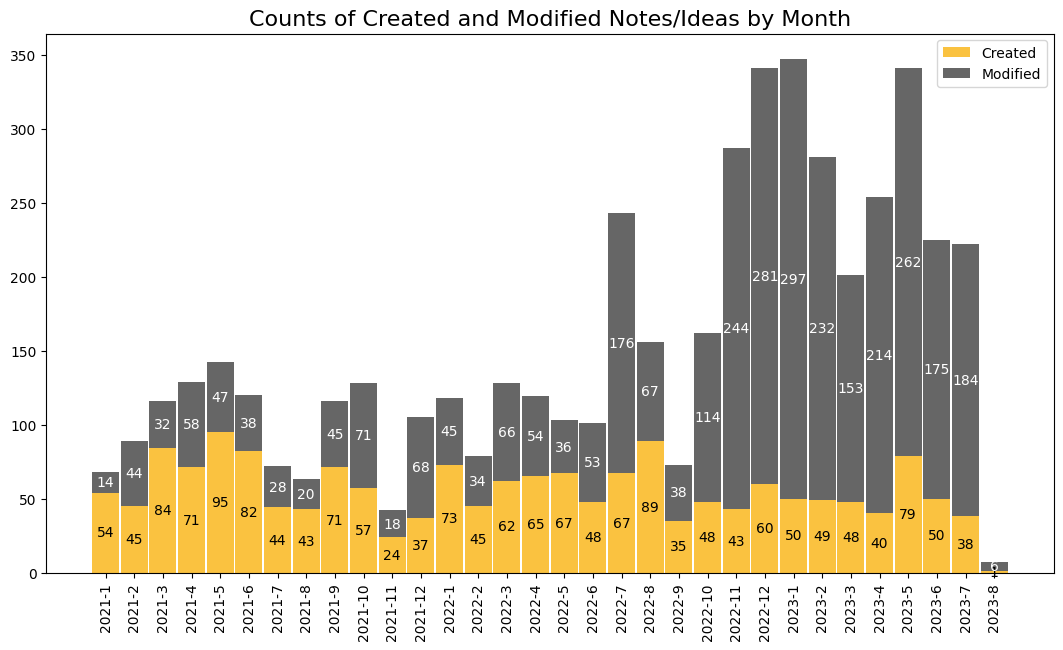

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the default size of the graph to 1300 x 700
mpl.rcParams['figure.figsize'] = (13, 7)

# Create a bar chart of the counts for each month
labels = [label for label, _, _ in counts_list]
created_counts = [created_count for _, created_count, _ in counts_list]
modified_counts = [modified_count for _, _, modified_count in counts_list]
width = .95
x = list(range(len(labels)))
x = [i - width/2 for i in x]
fig, ax = plt.subplots()
rects1 = ax.bar(x, created_counts, width, label='Created', color=(0.98, 0.76, 0.25))
rects2 = ax.bar(x, modified_counts, width, bottom=created_counts, label='Modified', color=(0.4, 0.4, 0.4))
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

# Add text labels to the bars
for i, rect in enumerate(rects1):
    ax.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height() / 2.0, str(created_counts[i]), ha='center', va='center', color='black')
    
y_offset = [0] * len(modified_counts)
for i, rect in enumerate(rects2):
    y = created_counts[i] + rect.get_height() / 2.0 + y_offset[i]
    ax.text(rect.get_x() + rect.get_width() / 2.0, y, str(modified_counts[i]), ha='center', va='center', color='white')
    y_offset[i] += rect.get_height()

# Add a title to the chart
ax.set_title('Counts of Created and Modified Notes/Ideas by Month', fontsize=16)

plt.show()